# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Инструкция по выполнению проекта

Загрузите и подготовьте данные. Поясните порядок действий.

Обучите и проверьте модель для каждого региона:
- 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
- 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
- 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- 2.5. Проанализируйте результаты.

Подготовьтесь к расчёту прибыли:
- 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
- 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
- 3.3. Напишите выводы по этапу подготовки расчёта прибыли.

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберите скважины с максимальными значениями предсказаний.
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитайте прибыль для полученного объёма сырья.

Посчитайте риски и прибыль для каждого региона:
- 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

## Загрузка и подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Проверим количество дубликатов

In [6]:
df1.duplicated().sum()

0

In [7]:
df2.duplicated().sum()

0

In [8]:
df3.duplicated().sum()

0

### Посмотрим информация по значениям

In [9]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Работа с данными

В данных отсутсвуют пропуски. Удалим из каждого датафрейма столбец id. Он не несет значимости для для модели.

In [12]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

In [13]:
# Построим гистограммы по столбцу product.
def hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

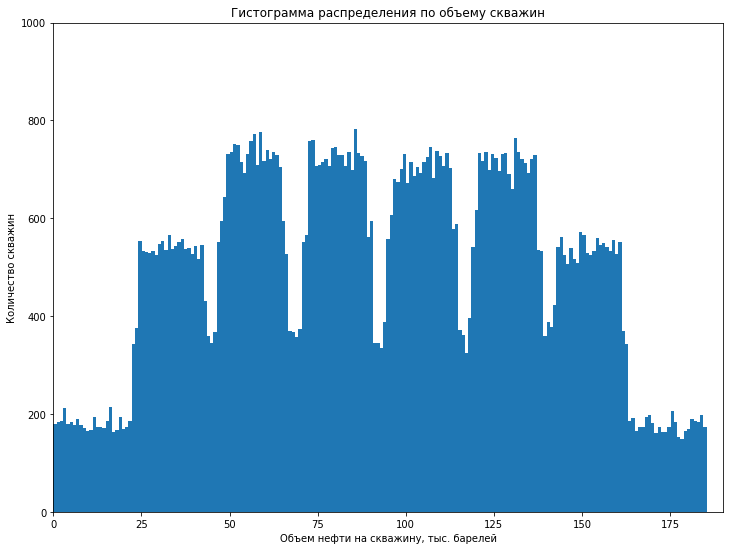

In [14]:
hist(df1['product'], 200, 190, 1000)

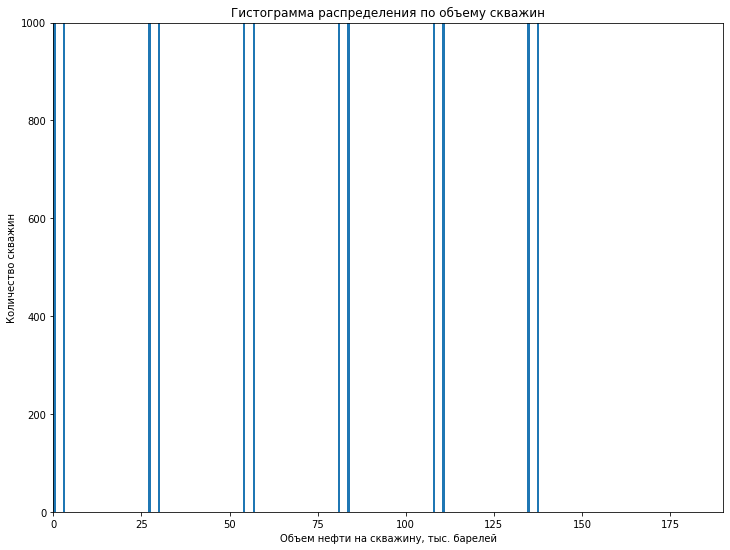

In [15]:
hist(df2['product'], 200, 190, 1000)

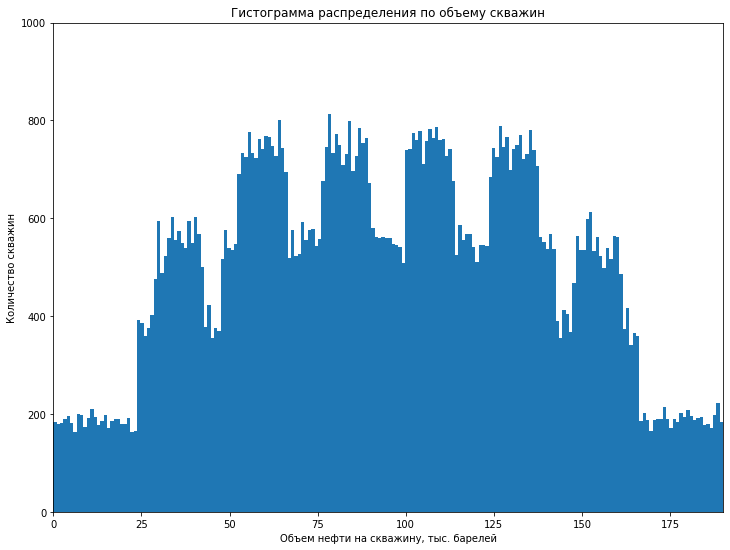

In [16]:
hist(df3['product'], 200, 190, 1000)

На графиках видно что в `df2` довольно много пропусков, необходимо выяснить сколько именно, напишем для этого функцию

In [17]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

In [18]:
check_zeros(df1, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [19]:
check_zeros(df2, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [20]:
check_zeros(df3, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


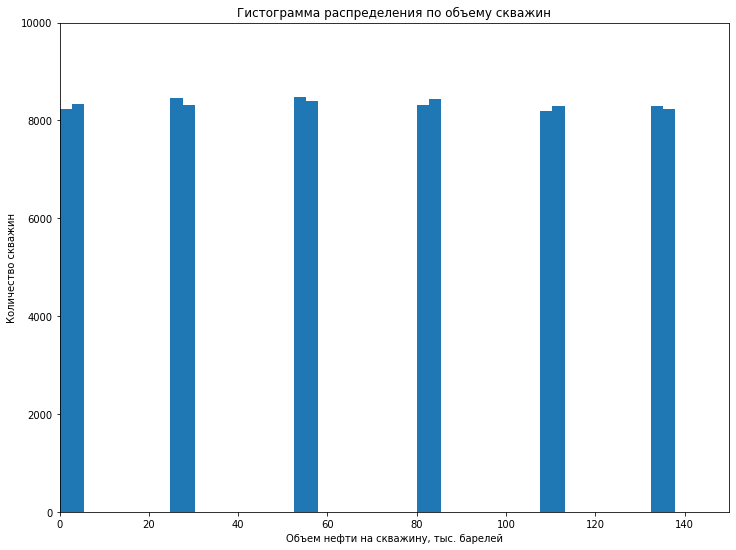

In [21]:
#Немного приблизим гистограмму по 2 датафрейму
hist(df2['product'], 50, 150, 10000)

**Вывод**
Целевой признак:

 - product.
 
Признаки модели:
- f0
- f1
- f2

**Данные готовы к обучению.**

Во втором датафрейме около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего датафрейма можно понять, что были утеряны данные или не они не были исследованы.

По гистограммам можно понять, что у первого и третьего фрейма распределение скважин близкое к нормальному. Во втором датафрейме данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

## Обучение и проверка модели

Выполняем разбивку неподготовленного датафрейма, для начала df1

In [22]:
#Функция для разбивки фрейма на выборки
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1515)
    
    return features_train, features_valid, target_train, target_valid

In [23]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(df1, 'product')

features_train_1.head()

,f0,f1,f2
1007,1.021117,0.041190,4.358261
61277,0.464478,0.986279,-1.566709
21764,0.325741,0.999537,2.957987
19778,1.083502,0.247936,2.420653
3155,0.150222,-0.019162,1.874492


In [24]:
#Функция для разбивки фрейма на масщтабируемой выборки
def test_split_scaled(df, numeric, target):
    geo_data_s = df.copy()

    features_s = geo_data_s.drop([target] , axis=1)
    target_s = geo_data_s[target]

    features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(
        features_s, target_s, test_size=0.25, random_state=1515)

    scaler = StandardScaler()
    scaler.fit(features_train_s[numeric])
    features_train_s[numeric] = scaler.transform(features_train_s[numeric])
    features_valid_s[numeric] = scaler.transform(features_valid_s[numeric])

    return features_train_s, features_valid_s, target_train_s, target_valid_s

In [25]:
# Обучение модели на неизмененных данных и выведем среднеквадратичную ошибку
model = LinearRegression()

model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 37.54514842848321


In [26]:
# Обучение модели на маштабированных данных и выведем среднеквадратичную ошибку
features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = test_split_scaled(
                                                                        df1, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_1s, target_train_1s)
predicted_target_1s = model.predict(features_valid_1s)
print('RMSE -', mean_squared_error(target_valid_1s, predicted_target_1s)**0.5)

RMSE - 37.54514842848321


In [27]:
# Аналогично сделаем с другими фреймами
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(df2, 'product')
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE -', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = test_split_scaled(
                                                                        df2, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_2s, target_train_2s)
predicted_target_2s = model.predict(features_valid_2s)
print('RMSE -', mean_squared_error(target_valid_2s, predicted_target_2s)**0.5)

RMSE - 0.8879923030757141
RMSE - 0.887992303075714


In [28]:
#Тоже самое
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(df3, 'product')
model.fit(features_train_3, target_train_3)
predicted_target_3 = model.predict(features_valid_3)
print('RMSE -', mean_squared_error(target_valid_3, predicted_target_3)**0.5)

features_train_3s, features_valid_3s, target_train_3s, target_valid_3s = test_split_scaled(
                                                                        df3, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_3s, target_train_3s)
predicted_target_3s = model.predict(features_valid_3s)
print('RMSE -', mean_squared_error(target_valid_3s, predicted_target_3s)**0.5)

RMSE - 40.12893608416936
RMSE - 40.12893608416936


**Вывод** Масштабирование данных не требуется. Проверим показатель RMSE при других гиперпараметрах модели.

In [29]:
model = LinearRegression(normalize=True)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 37.54514842848321


In [30]:
model = LinearRegression(fit_intercept=False)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 61.066109699807846


https://overcoder.net/q/2243360/%D1%87%D1%82%D0%BE-%D0%B8%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE-%D0%B4%D0%B5%D0%BB%D0%B0%D0%B5%D1%82-%D0%BC%D0%B5%D1%82%D0%BE%D0%B4-fitintercept-%D0%B2-%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B5-linearregression-%D0%B2-sklearn

**Вывод** Изменение стандартных значений гиперпараметров не улучшило модель

In [31]:
# Произведем вывод предсказанного запаса с реальным и выведем RMSE. Для этого напишем функцию.
model = LinearRegression()

def predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1515)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [32]:
df1_predicted, df1_rmse, df1_predicted_mean, df1_predicted_sum = predict(df1, 'product')
print(df1_predicted.head())
print('RMSE -', df1_rmse)
print('Средний запас запасанного сырья -', df1_predicted_mean)

       real_product  predicted_product
24747     78.226811          93.674616
84733    127.628863          80.667515
59479     73.801784         117.701301
74427     89.575175         102.994492
60722     79.104354          73.142791
RMSE - 37.54514842848321
Средний запас запасанного сырья - 92.67301020506795


In [33]:
df2_predicted, df2_rmse, df2_predicted_mean, df2_predicted_sum = predict(df2, 'product')
print(df2_predicted.head())
print('RMSE -', df2_rmse)
print('Средний запас запасанного сырья -', df2_predicted_mean)

       real_product  predicted_product
24747     26.953261          27.625164
84733     53.906522          55.590434
59479     80.859783          82.573347
74427    107.813044         110.005588
60722    107.813044         109.637297
RMSE - 0.8879923030757141
Средний запас запасанного сырья - 68.40182262737245


In [34]:
df3_predicted, df3_rmse, df3_predicted_mean, df3_predicted_sum = predict(df3, 'product')
print(df3_predicted.head())
print('RMSE -', df3_rmse)
print('Средний запас запасанного сырья -', df3_predicted_mean)

       real_product  predicted_product
24747    125.651756         124.610388
84733    137.961076         101.130654
59479     39.246669          80.389548
74427      8.503397          62.354405
60722     80.540259         104.481677
RMSE - 40.12893608416936
Средний запас запасанного сырья - 95.07347680345853


In [35]:
# Оценим общий запас на регион по предсказанным данным
print('Суммарный предсказанный запас в позиции 0 -', df1_predicted_sum)
print('Суммарный реальный запас в позиции 0 -', df1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 1 -', df2_predicted_sum)
print('Суммарный реальный запас в позиции 1 -', df2_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2 -', df3_predicted_sum)
print('Суммарный реальный запас в позиции 2 -', df3_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 0 - 2316825.255126699
Суммарный реальный запас в позиции 0 - 2316402.9055410437

Суммарный предсказанный запас в позиции 1 - 1710045.5656843113
Суммарный реальный запас в позиции 1 - 1710383.3136954207

Суммарный предсказанный запас в позиции 2 - 2376836.9200864634
Суммарный реальный запас в позиции 2 - 2382895.492237772


**Вывод**

Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. **Лучше всего модель предсказала запасы во втором фрейме (RMSE - 0.88), далее в первом и третьем соотвественно.**

Возможно утеряные данные из второго фрейма сказались на модели и она достаточно сильно переобучилась.

Но из-за утери данных и малого запаса в среднем не имеет смысла рассматривать второй фрейм как прибыльное месторождение.

Изучим все фреймы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 фреймом.

## Подготовка к расчёту прибыли

Создадим переменные об экономической информации.

In [36]:
budget = 10*(10**9) #10 000 000 000
print(budget)
chosen_points = 500 #исследуем 500 точек
best_points = 200 #200 лучших
price_per_barrel = 450000 #за 1000 баррель

10000000000


Расчитаем безубыточную разработку сырья на 200 месторождениях. И найдем среднее количество продукта в месторождениях необходимое для этого.

In [37]:
average_profit_per_point = budget / best_points
print('Средняя прибыль на лучшую точку -', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Средний объем нефти на точку -',average_barrels_per_point, 'тыс. баррелей')

average_barrels = budget / price_per_barrel
print('Средний объем нефти на регион -',average_barrels, 'тыс. баррелей')

Средняя прибыль на лучшую точку - 50000000.0 тыс.руб.
Средний объем нефти на точку - 111.11111111111111 тыс. баррелей
Средний объем нефти на регион - 22222.222222222223 тыс. баррелей


In [38]:
# Фактические запасы
print('Средний запас фактичекой нефти на скважину в 1', df1['product'].mean())
print('Средний запас фактичекой нефти на скважину в 2', df2['product'].mean())
print('Средний запас фактичекой нефти на скважину в 3', df3['product'].mean())

Средний запас фактичекой нефти на скважину в 1 92.50000000000001
Средний запас фактичекой нефти на скважину в 2 68.82500000000002
Средний запас фактичекой нефти на скважину в 3 95.00000000000004


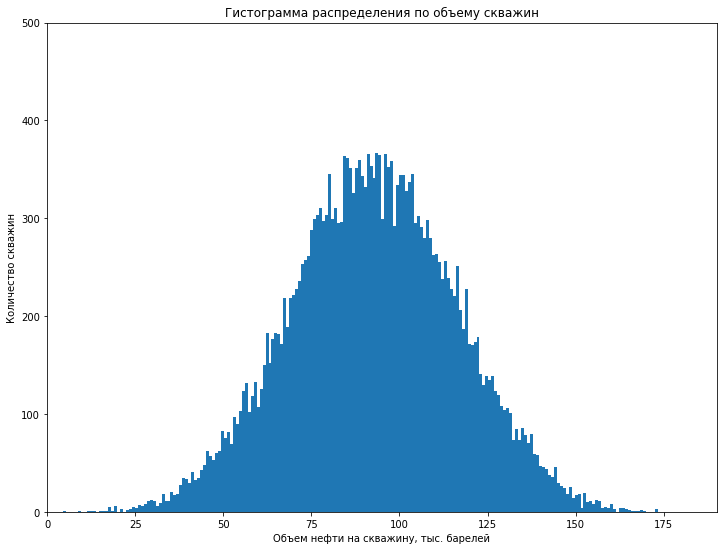

In [39]:
hist(df1_predicted['predicted_product'], 200, 190, 500)

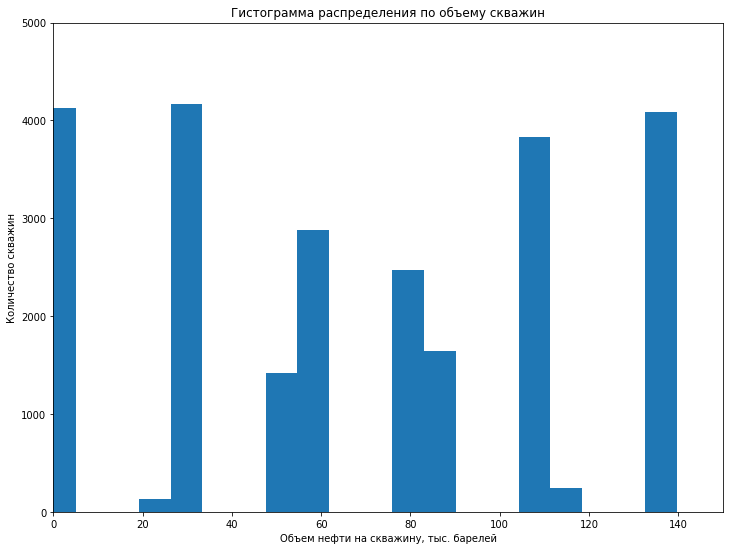

In [40]:
hist(df2_predicted['predicted_product'], 20, 150, 5000)

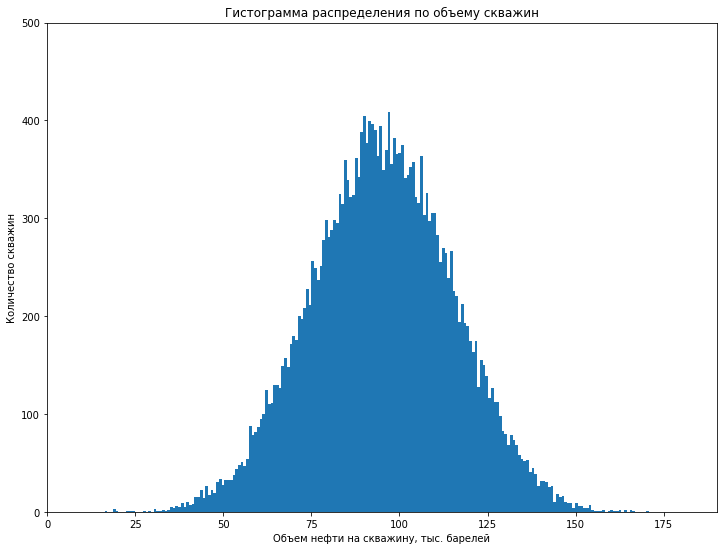

In [41]:
hist(df3_predicted['predicted_product'], 200, 190, 500)

**Вывод**
Анализ средних объемов на скважину для каждого региона следующий.
- Средний запас фактичекой нефти на скважину в 1 92.50000000000001
- Средний запас фактичекой нефти на скважину в 2 68.82500000000002
- Средний запас фактичекой нефти на скважину в 3 95.00000000000004

Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты. **Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.**

Во вторых данных мб и есть определенный смысл - значений больше 111 достаточно много и при определенной доли везения можно выбрать только лучшие в этой выборке, хотя и среднее значение 68.8.

## Расчёт прибыли и рисков 

In [42]:
# Функция для расчета прибыли на 500 разведанных точек.
def oil_profit_calculation(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

In [43]:
# Функция для применения техники Bootstrap с 1000 выборокам
state = np.random.RandomState(1515)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [44]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(df1_predicted['real_product'], 
                                                     df1_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль по региону = 443734511.80 тыс.руб.
95% доверительный интервал от -78431640.34 до 961105687.28 тыс.руб.
Процент риска 4.50%


In [45]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(df2_predicted['real_product'], 
                                                     df2_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по первому региону.
Средняя прибыль по региону = 407083574.13 тыс.руб.
95% доверительный интервал от 4647232.66 до 812517325.55 тыс.руб.
Процент риска 2.40%


In [46]:
average_3, lower_3, upper_3, risk_3 = bootstrap_1000(df3_predicted['real_product'], 
                                                     df3_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_3))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Данные по первому региону.
Средняя прибыль по региону = 380211362.65 тыс.руб.
95% доверительный интервал от -148445511.46 до 914493592.42 тыс.руб.
Процент риска 7.70%


**Вывод**

По итогу: 

Мы отсеиваем первый и третий регион, так как риски относительно велики (4.5% и 7.8%). Остается один единственный - второй, чей риск ниже требуемого (1.4%). `Кроме того доверительный интервал показывает, что даже при не очень удачном выборе разработка скважин окупится.`

# Вывод

1) Изучины данные. Проведена подготовка данных к моделированию, были проведены проверка на дубликаты и пропущенные значения.

2) Обучена модель для каждого фрейма (региона) df1, df2, df3.

3) Составлена функция расчета прибыли в регионе.

4) Посчитана прибыль и риски за каждый регион и обоснован выбор региона.

5) Второй регион получился одним из лучших по показателям предсказывания, хотя данные не выглядят нормально распределенными, что для меня довольно странно =)


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован